In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_excel('dataset_quiz.xlsx')

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


### Mengatasi #N/A

In [3]:
# Mengganti Nilai #N/A dengan nilai 0
df['id_ketua'] = df['id_ketua'].fillna(0)
df['id_anggota1'] = df['id_anggota1'].fillna(0)
df['id_anggota2'] = df['id_anggota2'].fillna(0)
df['id_anggota3'] = df['id_anggota3'].fillna(0)
df['id_anggota4'] = df['id_anggota4'].fillna(0)
df['id_anggota5'] = df['id_anggota5'].fillna(0)

# Cek kolom null
df.isnull().sum()


id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
id_anggota5           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

In [4]:
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


### Visualisasi Data

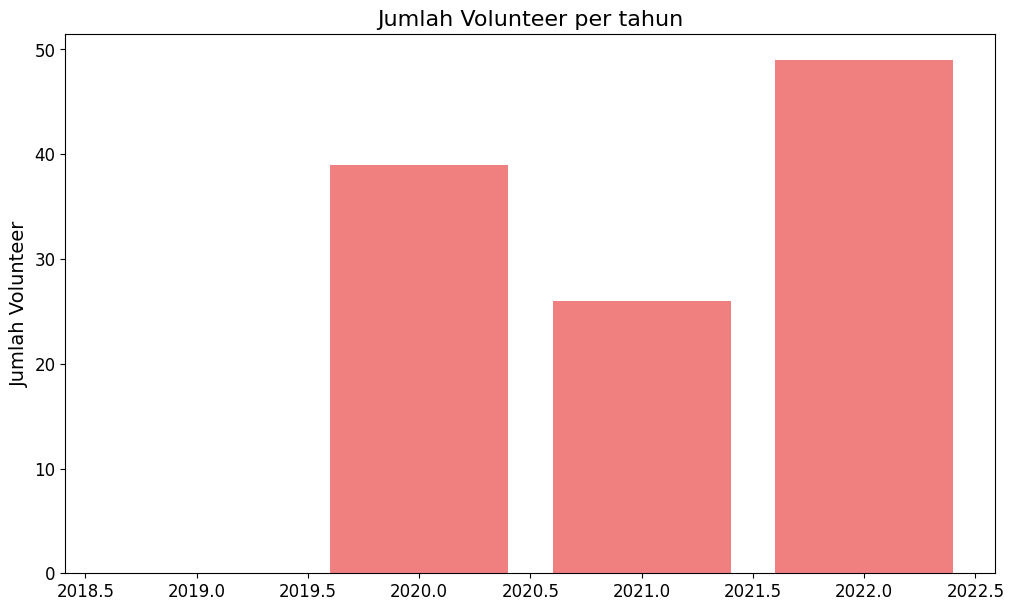

In [5]:
# Menggunakan Bar Plot
%matplotlib inline

tahun1 = df[df['tahun'] == 2019]['jml_vltr_terlibat'].sum()
tahun2 = df[df['tahun'] == 2020]['jml_vltr_terlibat'].sum()
tahun3 = df[df['tahun'] == 2021]['jml_vltr_terlibat'].sum()
tahun4 = df[df['tahun'] == 2022]['jml_vltr_terlibat'].sum()

tahun =[2019, 2020, 2021, 2022]
jml_vltr = [tahun1, tahun2, tahun3, tahun4]

plt.figure(figsize=(12,7))
plt.bar(tahun, jml_vltr, color='lightcoral')

plt.title('Jumlah Volunteer per tahun', size=16)
plt.ylabel('Jumlah Volunteer', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

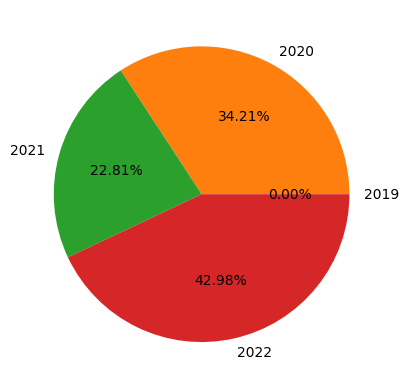

In [6]:
# Menggunakan Pie Chart
y = [tahun1, tahun2, tahun3, tahun4]
mylabels = [2019, 2020, 2021, 2022]

plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.show() 


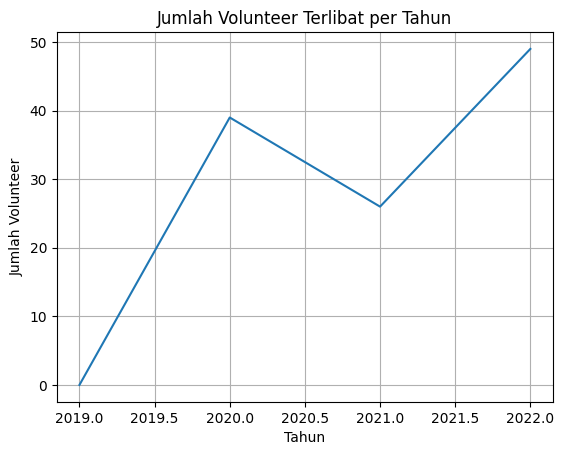

In [7]:
# Menggunakan Line Chart
y = [tahun1, tahun2, tahun3, tahun4]
x = [2019, 2020, 2021, 2022]
plt.plot(x, y)

plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunteer')

plt.title('Jumlah Volunteer Terlibat per Tahun')
plt.grid(True)

plt.show()

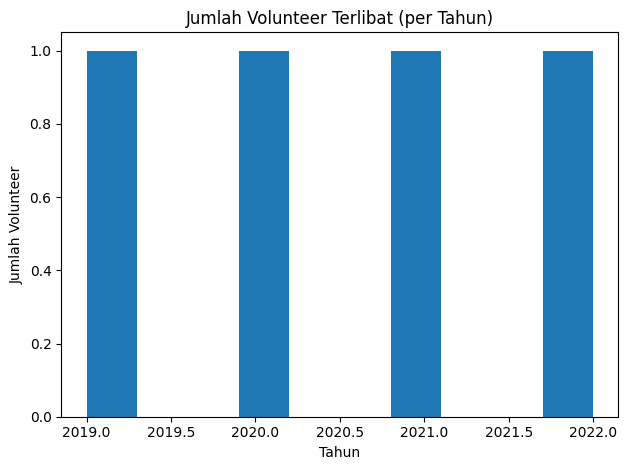

In [8]:
# Menggunakan Histogram
y = [tahun1, tahun2, tahun3, tahun4]
x = [2019, 2020, 2021, 2022]

plt.hist(x, data=y)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunteer')
plt.title('Jumlah Volunteer Terlibat (per Tahun)')
plt.tight_layout()
plt.show()

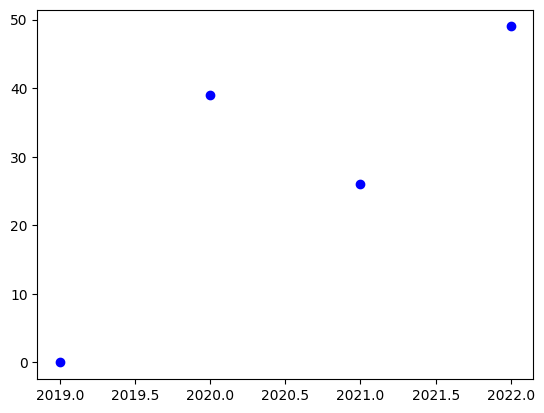

In [9]:
# Menggunakan Scatter Plot
y = [tahun1, tahun2, tahun3, tahun4]
x = [2019, 2020, 2021, 2022]
plt.scatter(x, y, color = 'blue')

plt.show()

In [10]:
# cek nama kolom
df.columns

Index(['id_ketua', 'id_anggota1', 'id_anggota2', 'id_anggota3', 'id_anggota4',
       'id_anggota5', 'keterlibatan_vltr', 'jml_vltr_terlibat', 'tahun',
       'skema', 'luaran_hki', 'jenis_luaran_hki', 'potensi_hki', 'luaran_lain',
       'jenis_luaran_lain', 'status_luaran_lain'],
      dtype='object')

In [11]:
# Cek kolom null
df.isnull().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
id_anggota5           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

In [12]:
# Cek kelengkapan data
print(df.info())
print('\n')

# cek statistik deskriptif
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ketua            85 non-null     float64
 1   id_anggota1         85 non-null     float64
 2   id_anggota2         85 non-null     float64
 3   id_anggota3         85 non-null     float64
 4   id_anggota4         85 non-null     float64
 5   id_anggota5         85 non-null     float64
 6   keterlibatan_vltr   85 non-null     object 
 7   jml_vltr_terlibat   85 non-null     int64  
 8   tahun               85 non-null     int64  
 9   skema               85 non-null     object 
 10  luaran_hki          85 non-null     object 
 11  jenis_luaran_hki    85 non-null     object 
 12  potensi_hki         85 non-null     object 
 13  luaran_lain         85 non-null     object 
 14  jenis_luaran_lain   85 non-null     object 
 15  status_luaran_lain  85 non-null     object 
dtypes: float64

### Seleksi Fitur

In [13]:
# Seleksi fitur
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])
    
    X = df.drop(["jml_vltr_terlibat"], axis=1)
    
    y = df['jml_vltr_terlibat']


### Data Training dan Testing

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Metode Klasifikasi

In [42]:
# from sklearn.tree import DecisionTreeClassifier # import DT
# from sklearn.ensemble import RandomForestClassifier # import RandomForest

# dt = DecisionTreeClassifier()

# # Sesuaikan dt ke set training
# dt.fit(X_train, y_train)

# # Memprediksi label set test
# y_pred_dt = dt.predict(X_test)

# # Menghitung sek accuracy
# acc_dt = accuracy_score(y_test, y_pred_dt)
# print("Test set accuracy: {:.2f}".format(acc_dt))
# print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.76
Test set accuracy: 0.7647058823529411


### a. GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

gnb_std = GaussianNB()

# Fit dengan data yang telah di standarisasi
gnb_std.fit(X_train_std, y_train)

# Prediksi dengan data test
y_pred_gnb = gnb_std.predict(X_test_std)

# Evaluasi akurasi testing data
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_gnb))
print(f"Test set accuracy: {acc_gnb}")



Test set accuracy: 0.76
Test set accuracy: 0.7647058823529411


#### b. RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier # import RandomForest
rf = RandomForestClassifier(max_features=5, n_estimators=500)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

# Menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.88
Test set accuracy: 0.8823529411764706


#### Perbandingan Akurasi

In [17]:
from sklearn.ensemble import VotingClassifier # import model Voting

In [50]:
clf1 = GaussianNB()
clf2 = RandomForestClassifier(n_estimators=10, random_state=1)


# model hard voting
voting = VotingClassifier(estimators=[('GaussianNB', clf1), ('RandomForestClassifier', clf2)], voting='hard')

# Fit model
voting.fit(X_train_std, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test_std)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.76
Test set accuracy: 0.7647058823529411


### Confusion Matrix dan ROC

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
gnb_std_probs = gnb_std.predict_proba(X_test_std)

# roc_auc_score(y_score = rf.predict(X_test), y_true=rf.score, multi_class="tahun",average=None)

rf_probs = rf_probs[:, 1]
gnb_std_probs = gnb_std_probs[:, 1]

# r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gnb_std_auc = roc_auc_score(y_test, gnb_std_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (gnb_std_auc))

ValueError: multi_class must be in ('ovo', 'ovr')

### Hyperparameter Tunning 

##### a. Menggunakan GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# inisiasi repated k-fold
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(dt, param_grid=params, cv=cv)

# Fit / latih berdasarkan grid
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunkan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
%timeit grid.fit(X,y)

# Evaluasi dengan score
score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')


699 ms ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.9882352941176471
Konfigurasi hyperparameter: {'criterion': 'gini', 'max_depth': 7}


##### b. Menggunakan Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan hyperparameter yang akan digunakan
# sklearn menerima dalam bentuk dictionary
# nama hyperparameter HARUS SESUAI dengan dokumentasi sklearn
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
random = RandomizedSearchCV(dt, params, cv=cv)

# Fit / latih berdasarkan grid
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
%timeit random.fit(X,y)

# Evaluasi dengan score
score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {random.best_params_}')

395 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 9, 'criterion': 'gini'}


##### c. Menggunakan Exhausive Search

In [ ]:
# from sklearn.model_selection import 

# # Definisikan hyperparameter yang akan digunakan
# # sklearn menerima dalam bentuk dictionary
# # nama hyperparameter HARUS SESUAI dengan dokumentasi sklearn
# params = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': list(range(5,11))
# }

# # inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
# random = RandomizedSearchCV(dt, params, cv=cv)

# # Fit / latih berdasarkan grid
# # %timeit merupakan magic command didalam ipython notebook
# # yang dapat kita gunakan untuk menghitung waktu komputasi
# # cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
# %timeit random.fit(X,y)

# # Evaluasi dengan score
# score = random.score(X,y)

# print(f'Hasil evaluasi: {score}')
# print(f'Konfigurasi hyperparameter: {random.best_params_}')

### Visualisasi Hasil Klasifikasi

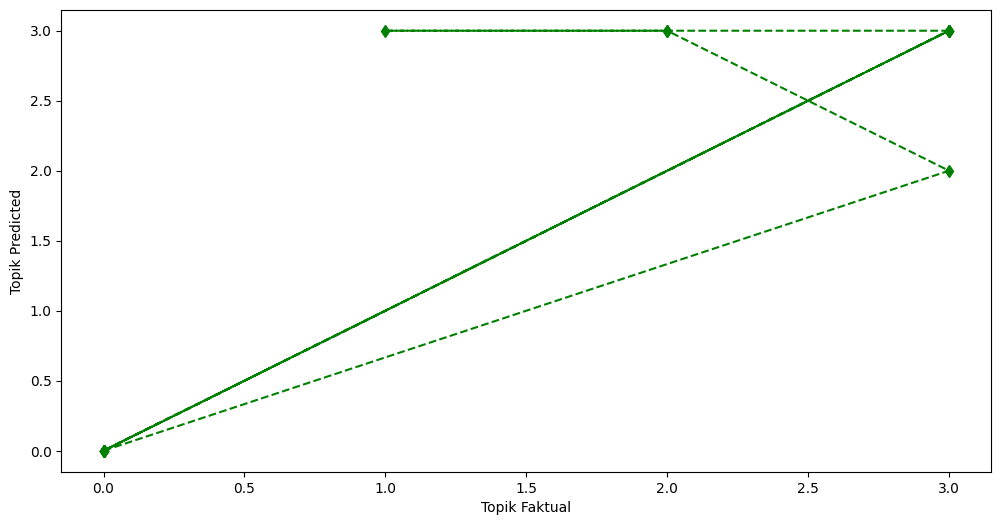

In [21]:
#line plot pada decision Tree

plt.figure(figsize=(12,6))
plt.plot(y_test, y_pred_dt,'g--d')
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

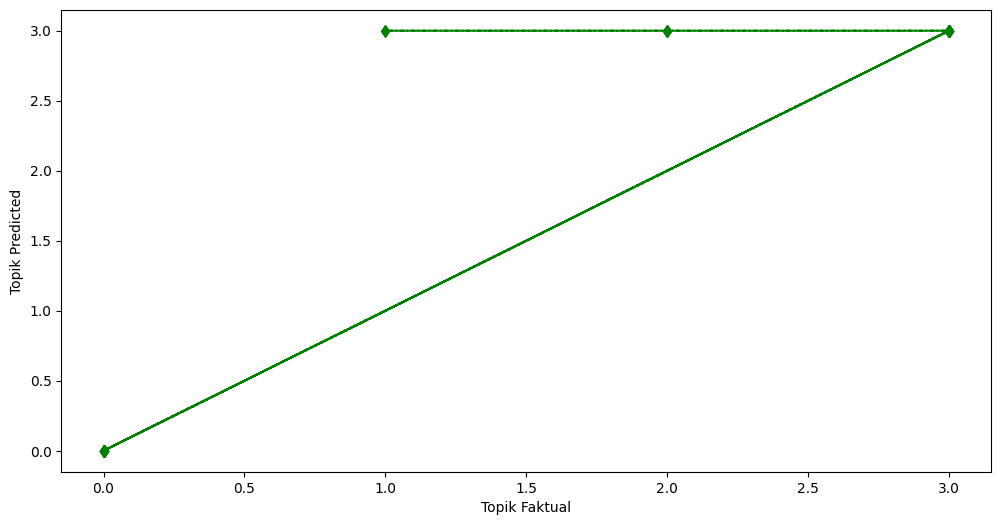

In [22]:
#line plot pada RandomForest

plt.figure(figsize=(12,6))
plt.plot(y_test, y_pred_rf,'g--d')
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()